In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Conv2D, Dropout,Activation,MaxPooling2D,Flatten, Input
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np



In [43]:
#EN ESTA PARTE DEL CÓDIGO SE COLOCAN LAS IMAGENES DE PERROS Y GATOS EN DIFERENTES DATAFILES

ih, iw = 150, 150 #Se define el tamano de la imagen
input_shape = (ih, iw, 3) #forma de la imagen: alto ancho y numero de canales

train_dir = 'C:/Users/Victor Fuentes/MAESTRÍA/Tarea_4/train' #Nombre del directorio de entrenamiento
test_dir = 'C:/Users/Victor Fuentes/MAESTRÍA/Tarea_4/test' #Nombre del directorio de prueba


num_class = 2 #cuantas clases (Perros y Gatos)
epochs = 25 #cuantas veces entrenar. En cada epoch hace una mejora en los parametros
batch_size = 100 #batch para hacer cada entrenamiento. Lee 50 'batch_size' imagenes antes de actualizar los parametros. Las carga a memoria
num_train = 20000 #numero de imagenes en train
num_test = 5000 #numero de imagenes en test

epoch_steps = num_train // batch_size
test_steps = num_test // batch_size
gentrain = ImageDataGenerator(rescale=1. / 255.) #indica que reescale cada canal con valor entre 0 y 1.
train = gentrain.flow_from_directory(train_dir,
                batch_size=batch_size,
                target_size=(iw, ih),
                class_mode='binary')
gentest = ImageDataGenerator(rescale=1. / 255)
test = gentest.flow_from_directory(test_dir,
                batch_size=batch_size,
                target_size=(iw, ih),
                class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


(150, 150, 3)


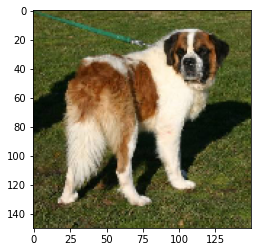

la forma de la imagen es: (100, 150, 150, 3)


In [47]:
#AQUÍ IMPRIMIMOS LA IMAGEN 0 DEL DATA FILE

import matplotlib.pyplot as plt

imagescolores = train[0][0]
imagecolor = train[0][0][0]  # Obtener la primera imagen del lote
print(imagecolor.shape)
plt.imshow(imagecolor)
plt.show()
print("la forma de la imagen es:", train[0][0].shape)

4/4 [==============================] - 0s 2ms/step


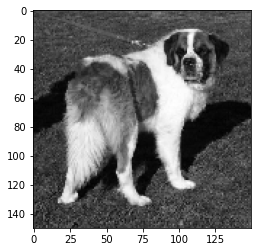

la forma de la imagen es: (150, 150, 1)


In [48]:
#AQUÍ HACEMOS LA CAPA QUE NOS REALIZARÁ LA CONVOLUCIÓN PIXEL A PIXEL, 
#NOS DARÁ COMO RESULTADO UNA IMAGEN CON UN SOLO CANAL, ES DECIR; EN ESCALA DE GRISES


inputs = Input(shape=(150, 150, 3))
#Se construye una capa convolucional de un filtro de 1x1
conv_layer = Conv2D(1, (1, 1), activation='relu',  use_bias=False, weights=[np.ones((1, 1, 3, 1))])
output = conv_layer(inputs)

# Crear el modelo
model = Model(inputs=inputs, outputs=output)

# Obtener la imagen en escala de grises
imagegray = model.predict(imagescolores)

#Aquí se mapea usando cmap gray
plt.imshow(imagegray[0], cmap = 'gray')
plt.show()
print("la forma de la imagen es:", imagegray[0].shape)

imagen a reconocer


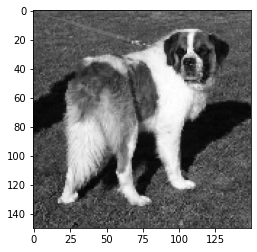

In [49]:
#Aquí se hace "aplanando el vector" y recorriendo pixel por pixel, sumando los que se encuentran en distintos canales.


imtest = imagecolor #Leemos nuestra imagen
plt.imshow(imtest) #La visualizamos
imtest = np.reshape(imtest,(22500,3)) # La convertimos en vector
#Convertimos a blanco y negro la imagen:
lst = []

for i in imtest:
    pix=i[0]*0.2125+i[1]*0.7174+i[2]*0.0721 #transfomamos a escala de grises   
    lst.append(pix)

imtest=np.array(lst).reshape(150,150) #acomodamos la imagen para poder ver como quedó
imtest=(imtest/imtest.max()) #normalizamos
plt.imshow(imtest, cmap = 'gray') #visualizamos la imagen
print("imagen a reconocer")
plt.show()